In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
from pyimagesearch.nn.conv import LeNet
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2
import os

In [3]:
data = []
labels = []
for imagePath in sorted(list(paths.list_images("/data/tangle/pyimagesearch/SMILEs"))):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = imutils.resize(image, width=28)
    image = img_to_array(image)
    data.append(image)
    
    label = imagePath.split(os.path.sep)[-3]
    label = "smiling" if label == "positives" else "not_smiling"
    labels.append(label)

In [6]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [7]:
le = LabelEncoder().fit(labels)

In [9]:
labels = np_utils.to_categorical(le.transform(labels), 2)

In [11]:
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [14]:
classWeight

array([1.        , 2.56775068])

In [15]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [16]:
model = LeNet.build(width=28, height=28, depth=1, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), 
              class_weight=classWeight, batch_size=64, epochs=15, verbose=1)

Train on 10532 samples, validate on 2633 samples
Epoch 1/15
10532/10532 [==============================] - 20s - loss: 0.4450 - acc: 0.7965 - val_loss: 0.3342 - val_acc: 0.8534
Epoch 2/15
10532/10532 [==============================] - 1s - loss: 0.2842 - acc: 0.8854 - val_loss: 0.2731 - val_acc: 0.8883
Epoch 3/15
10532/10532 [==============================] - 1s - loss: 0.2439 - acc: 0.9036 - val_loss: 0.2542 - val_acc: 0.9001
Epoch 4/15
10532/10532 [==============================] - 1s - loss: 0.2370 - acc: 0.9065 - val_loss: 0.2658 - val_acc: 0.8952
Epoch 5/15
10532/10532 [==============================] - 1s - loss: 0.2170 - acc: 0.9157 - val_loss: 0.2434 - val_acc: 0.9016
Epoch 6/15
10532/10532 [==============================] - 1s - loss: 0.2083 - acc: 0.9186 - val_loss: 0.2407 - val_acc: 0.9073
Epoch 7/15
10532/10532 [==============================] - 1s - loss: 0.1979 - acc: 0.9228 - val_loss: 0.2312 - val_acc: 0.9096
Epoch 8/15
10532/10532 [==============================] - 1s 

In [18]:
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
                           predictions.argmax(axis=1), target_names=le.classes_))

              precision    recall  f1-score   support

 not_smiling       0.94      0.94      0.94      1895
     smiling       0.84      0.85      0.85       738

   micro avg       0.91      0.91      0.91      2633
   macro avg       0.89      0.89      0.89      2633
weighted avg       0.91      0.91      0.91      2633



In [19]:
model.save("lenet.hdf5")

In [20]:
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [62]:
image = cv2.imread("smile3.png")
image = imutils.resize(image, width=300)
imageClone = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [63]:
rects = detector.detectMultiScale(gray, scaleFactor=1.1,
                                 minNeighbors=5, minSize=(30, 30),
                                 flags=cv2.CASCADE_SCALE_IMAGE)

In [64]:
for (fX, fY, fW, fH) in rects:
    roi = gray[fY:fY + fH, fX:fX + fW]
    roi = cv2.resize(roi, (28, 28))
    roi = roi.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

In [65]:
(notSmiling, smiling) = model.predict(roi)[0]
label = "Smiling" if smiling > notSmiling else "Not Smiling"

In [66]:
label

'Not Smiling'

In [67]:
cv2.rectangle(imageClone, (fX, fY), (fX + fW, fY + fH),
             (0, 0, 255), 2)
cv2.putText(imageClone, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX,
           0.45, (0, 0, 255), 2)

array([[[180, 150,  96],
        [180, 150,  96],
        [175, 142,  90],
        ...,
        [130, 100,  94],
        [130, 100,  94],
        [130, 100,  94]],

       [[180, 150,  96],
        [180, 150,  96],
        [175, 142,  90],
        ...,
        [130, 100,  94],
        [130, 100,  94],
        [130, 100,  94]],

       [[182, 151,  86],
        [182, 151,  86],
        [178, 145,  81],
        ...,
        [135, 105,  95],
        [135, 105,  95],
        [135, 105,  95]],

       ...,

       [[150, 121,  28],
        [150, 121,  28],
        [148, 119,  27],
        ...,
        [ 99,  52,  10],
        [104,  55,   9],
        [104,  55,   9]],

       [[149, 121,  28],
        [149, 121,  28],
        [148, 119,  27],
        ...,
        [100,  52,  10],
        [105,  56,  10],
        [105,  56,  10]],

       [[149, 121,  28],
        [149, 121,  28],
        [148, 119,  27],
        ...,
        [100,  52,  10],
        [105,  56,  10],
        [105,  56,  10]]

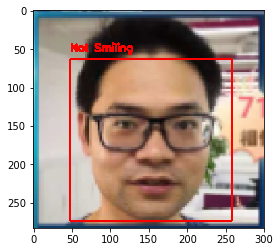

In [68]:
%matplotlib inline
#image = cv2.imread("smile2.jpeg")
#imageClone = image
img_rgb = np.zeros(imageClone.shape, imageClone.dtype)
img_rgb[:,:,0] = imageClone[:,:,2]
img_rgb[:,:,1] = imageClone[:,:,1]
img_rgb[:,:,2] = imageClone[:,:,0]
plt.imshow(img_rgb)